In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('jsrt_metadata.csv')

In [5]:
df

,study_id,subtlety,size,age,gender,x,y,state,position,diagnosis
0,JPCLN001.png,5.0,15.0,53,Male,1634.0,692.0,malignant,l.upper lobe,lung cancer
1,JPCLN002.png,5.0,30.0,78,Female,1614.0,1090.0,benign,l.upper lobe(S5),pulmonary hematoma
2,JPCLN003.png,5.0,30.0,63,Female,1303.0,447.0,malignant,l.upper lobe(S1+2),lung cancer
3,JPCLN004.png,5.0,14.0,68,Female,606.0,836.0,benign,r.upper lobe,Inflammatory mass
4,JPCLN005.png,5.0,35.0,73,Female,1438.0,692.0,malignant,l.upper lobe(S3),lung cancer
...,...,...,...,...,...,...,...,...,...,...
242,JPCNN089.png,NaN,NaN,50,Male,NaN,NaN,non-nodule,NaN,NaN
243,JPCNN090.png,NaN,NaN,68,Female,NaN,NaN,non-nodule,NaN,NaN
244,JPCNN091.png,NaN,NaN,81,Male,NaN,NaN,non-nodule,NaN,NaN
245,JPCNN092.png,NaN,NaN,70,Female,NaN,NaN,non-nodule,NaN,NaN


In [6]:
df.isnull().sum()

study_id      0
subtlety     93
size         93
age           0
gender        0
x            93
y            93
state         0
position     93
diagnosis    93
dtype: int64

# Processing Data


In [7]:
df.replace('?',np.nan,inplace=True)

m = df['size'].astype('float').mean()
df['size'].replace(np.nan,m,inplace=True)
m = df['age'].astype('float').mean()
df['age'].replace(np.nan,m,inplace=True)
m = df['x'].astype('float').mean()
df['x'].replace(np.nan,m,inplace=True)
m = df['y'].astype('float').mean()
df['y'].replace(np.nan,m,inplace=True)

m = df['subtlety'].value_counts().idxmax()
df['subtlety'].replace(np.nan,m,inplace=True)
m = df['position'].value_counts().idxmax()
df['position'].replace(np.nan,m,inplace=True)
m = df['diagnosis'].value_counts().idxmax()
df['diagnosis'].replace(np.nan,m,inplace=True)

In [8]:
df.isnull().sum()

study_id     0
subtlety     0
size         0
age          0
gender       0
x            0
y            0
state        0
position     0
diagnosis    0
dtype: int64

In [9]:
df

,study_id,subtlety,size,age,gender,x,y,state,position,diagnosis
0,JPCLN001.png,5.0,15.000000,53,Male,1634.000000,692.000000,malignant,l.upper lobe,lung cancer
1,JPCLN002.png,5.0,30.000000,78,Female,1614.000000,1090.000000,benign,l.upper lobe(S5),pulmonary hematoma
2,JPCLN003.png,5.0,30.000000,63,Female,1303.000000,447.000000,malignant,l.upper lobe(S1+2),lung cancer
3,JPCLN004.png,5.0,14.000000,68,Female,606.000000,836.000000,benign,r.upper lobe,Inflammatory mass
4,JPCLN005.png,5.0,35.000000,73,Female,1438.000000,692.000000,malignant,l.upper lobe(S3),lung cancer
...,...,...,...,...,...,...,...,...,...,...
242,JPCNN089.png,3.0,17.246753,50,Male,937.324675,868.623377,non-nodule,r.upper lobe(S2),lung cancer
243,JPCNN090.png,3.0,17.246753,68,Female,937.324675,868.623377,non-nodule,r.upper lobe(S2),lung cancer
244,JPCNN091.png,3.0,17.246753,81,Male,937.324675,868.623377,non-nodule,r.upper lobe(S2),lung cancer
245,JPCNN092.png,3.0,17.246753,70,Female,937.324675,868.623377,non-nodule,r.upper lobe(S2),lung cancer


# Part 1 
1. Find the total number of patients of each disease (diagnosis) and plot in histogram.

In [10]:
import matplotlib as plt
from matplotlib import pyplot

In [11]:
df['diagnosis'].value_counts()

lung cancer                                       149
lung cancer(adenocarcinoma)                        23
tuberculoma                                        14
granuloma                                           8
lung cancer(bronchioloalveolar cell carcinoma)      7
unknown                                             4
metastasis of colon cancer                          4
inflammatory mass                                   4
pulmonary tuberculosis                              3
lung abscess                                        2
Cryptococcosis                                      2
lung cancer(squamous cell carcinoma)                2
Inflammatory mass                                   2
pulmonary hematoma                                  2
susp. inflammatory mass                             2
hamartoma                                           2
sclerosing hemangioma                               2
lung cancer(large cell carcinoma)                   1
susp. hamartoma             

(array([167.,  33.,  13.,   5.,   8.,   7.,   3.,   3.,   4.,   4.]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ]),
 <BarContainer object of 10 artists>)

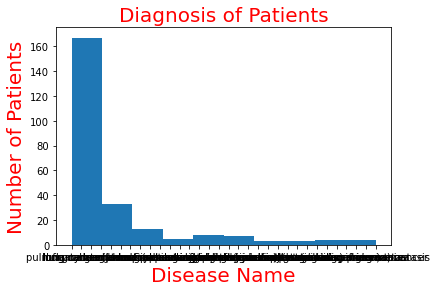

In [12]:
plt.pyplot.ylabel("Number of Patients",fontsize=20,color='Red')
plt.pyplot.xlabel("Disease Name",fontsize=20,color='Red')
plt.pyplot.title("Diagnosis of Patients",fontsize=20,color='Red')
plt.pyplot.hist(df['diagnosis'])

# Part 2
2. Find the total number of patients of each disease (diagnosis) with respect to the disease state(malignant or benign) and plot in a pie chart.

In [13]:
df[['diagnosis','state']].value_counts()

diagnosis                                       state     
lung cancer                                     non-nodule    93
                                                malignant     56
lung cancer(adenocarcinoma)                     malignant     23
tuberculoma                                     benign        14
granuloma                                       benign         8
lung cancer(bronchioloalveolar cell carcinoma)  malignant      7
metastasis of colon cancer                      malignant      4
unknown                                         benign         4
inflammatory mass                               benign         4
pulmonary tuberculosis                          benign         3
lung abscess                                    benign         2
Inflammatory mass                               benign         2
susp. inflammatory mass                         benign         2
sclerosing hemangioma                           benign         2
pulmonary hematoma             

In [14]:
l = df['diagnosis'] + " " + df['state']
l.value_counts()
lbl =('lung cancer non-nodule','lung cancer malignant', 'lung cancer(adenocarcinoma) malignant',                      
'tuberculoma benign','granuloma benign','lung cancer(bronchioloalveolar cell carcinoma) malignant',     
'inflammatory mass benign','unknown benign','metastasis of colon cancer malignant',                         
'pulmonary tuberculosis benign','sclerosing hemangioma benign' ,'susp. inflammatory mass benign','pulmonary hematoma benign' ,                                   
'Inflammatory mass benign','lung cancer(squamous cell carcinoma) malignant','Cryptococcosis benign',                                        
'lung abscess benign','hamartoma benign' ,'susp. sclerosing hemangioma benign',                           
'metastatic lung cancer malignant','susp. lung metastasis malignant',                              
'susp. hamartoma benign' ,'metastasis of uterine cancer malignant' ,                      
'organizing pneumonia benign','metastasis of ovarian cancer malignant',                       
'pneumonia benign','lung cancer(large cell carcinoma) malignant',                  
'organiging pneumonia benign','calcified granuloma benign',                                   
'lung cancer(adenosquamous carcinoma) malignant','lung canceror metastasis malignant',                           
'lung cancer(small cell carcinoma) malignant','susp.tuberculoma benign') 

([<matplotlib.patches.Wedge at 0x143f05df310>,
 [Text(0.4160997880601955, 1.0182637017866543, 'lung cancer non-nodule'),
  Text(-1.0977763719436746, 0.0699073472689613, 'lung cancer malignant'),
  Text(-0.6476951466668902, -0.8890956062112532, 'lung cancer(adenocarcinoma) malignant'),
  Text(-0.1741504033155111, -1.0861268972937945, 'tuberculoma benign'),
  Text(0.1325903404163534, -1.091979762462783, 'granuloma benign'),
  Text(1.1037481012795065, -3.426622262363024, 'lung cancer(bronchioloalveolar cell carcinoma) malignant'),
  Text(1.5708157584260751, -3.2392187102880707, 'inflammatory mass benign'),
  Text(1.8917195800677313, -3.0629066310268698, 'unknown benign'),
  Text(2.1930544366926066, -2.854910197835104, 'metastasis of colon cancer malignant'),
  Text(2.438213664786331, -2.6486060720403874, 'pulmonary tuberculosis benign'),
  Text(2.6016094394707476, -2.4882982788356998, 'sclerosing hemangioma benign'),
  Text(2.724783253016403, -2.3527762800745315, 'susp. inflammatory mass 

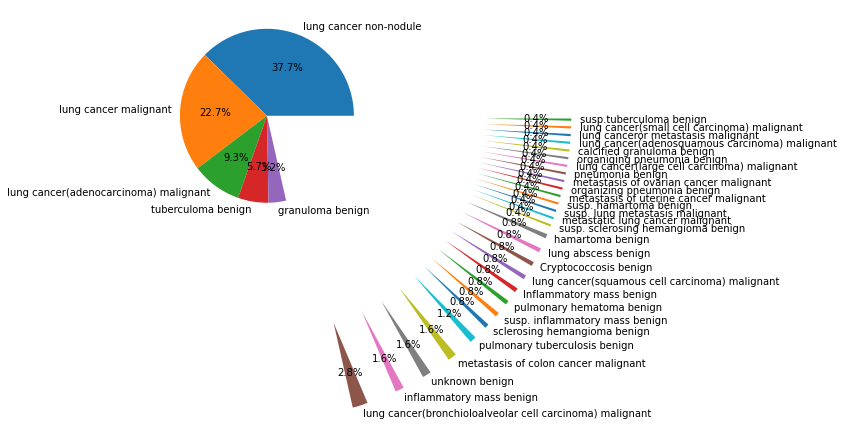

In [15]:
labels=('malignant','non-nodule','benign')
plt.pyplot.pie(l.value_counts(),explode=[0,0,0,0,0,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5],labels=lbl,autopct='%1.1f%%')

# Part 3
3. Find and plot via pia chart the total number of patients of each disease (diagnosis) with respect to the gender(Female,Male)

In [16]:
df[['diagnosis','gender']].value_counts()

diagnosis                                       gender
lung cancer                                     Male      75
                                                Female    74
lung cancer(adenocarcinoma)                     Female    15
tuberculoma                                     Male       9
lung cancer(adenocarcinoma)                     Male       8
granuloma                                       Male       6
tuberculoma                                     Female     5
unknown                                         Female     4
lung cancer(bronchioloalveolar cell carcinoma)  Female     4
pulmonary tuberculosis                          Male       3
lung cancer(bronchioloalveolar cell carcinoma)  Male       3
metastasis of colon cancer                      Female     3
Cryptococcosis                                  Female     2
hamartoma                                       Female     2
inflammatory mass                               Male       2
                              

In [17]:
z = df['diagnosis'] +"  "+ df['gender']

In [18]:
lbl =('lung cancer  Male',                                         
'lung cancer  Female',                                       
'lung cancer(adenocarcinoma)  Female',                       
'tuberculoma  Male',                                          
'lung cancer(adenocarcinoma)  Male',                          
'granuloma  Male',                                            
'tuberculoma  Female',                                        
'unknown  Female',                                            
'lung cancer(bronchioloalveolar cell carcinoma)  Female',    
'lung cancer(bronchioloalveolar cell carcinoma)  Male',       
'metastasis of colon cancer  Female',                         
'pulmonary tuberculosis  Male',                               
'lung cancer(squamous cell carcinoma)  Male ',                
'inflammatory mass  Male',                               
'inflammatory mass  Female',                                  
'Cryptococcosis  Female ',                                    
'sclerosing hemangioma  Female',                           
'hamartoma  Female',                                          
'granuloma  Female',                                          
'Inflammatory mass  Female',                                  
'lung cancer(large cell carcinoma)  Male',                    
'metastatic lung cancer  Female',                             
'pneumonia  Female',                                          
'metastasis of uterine cancer  Female',                       
'susp. inflammatory mass  Female',                            
'metastasis of ovarian cancer  Female',                       
'organizing pneumonia  Female',                               
'lung cancer(adenosquamous carcinoma)  Male',                 
'susp. hamartoma  Male',                                      
'calcified granuloma  Male',                                  
'lung abscess  Female',                                       
'pulmonary hematoma  Male',                                   
'lung canceror metastasis  Female',                           
'lung cancer(small cell carcinoma)  Male',                    
'susp. inflammatory mass  Male',                              
'susp.tuberculoma  Male',                                     
'pulmonary hematoma  Female',                                 
'metastasis of colon cancer  Male',                           
'organiging pneumonia  Male',                                 
'susp. sclerosing hemangioma  Female',                        
'lung abscess  Male',                                         
'susp. lung metastasis  Female') 

([<matplotlib.patches.Wedge at 0x143f08833a0>,
 [Text(0.6363346275672915, 0.8972615236143789, 'lung cancer  Male'),
  Text(-1.0532668978197752, 0.3172204942261888, 'lung cancer  Female'),
  Text(-0.7346562374226806, -0.8187064265143827, 'lung cancer(adenocarcinoma)  Female'),
  Text(-0.4546412912955383, -1.0016492880490286, 'tuberculoma  Male'),
  Text(-0.8541377969248605, -4.010043469074163, 'lung cancer(adenocarcinoma)  Male'),
  Text(-0.13034740526525962, -4.097927470556381, 'granuloma  Male'),
  Text(0.4423944967285806, -4.076062696925093, 'tuberculoma  Female'),
  Text(0.9050717633496175, -3.9988554741559756, 'unknown  Female'),
  Text(1.3065802366768944, -3.8862382949486447, 'lung cancer(bronchioloalveolar cell carcinoma)  Female'),
  Text(1.6469515931929908, -3.7546704848333987, 'lung cancer(bronchioloalveolar cell carcinoma)  Male'),
  Text(1.9284140001827748, -3.618179023196485, 'metastasis of colon cancer  Female'),
  Text(2.1986511097767183, -3.4606261424022104, 'pulmonary t

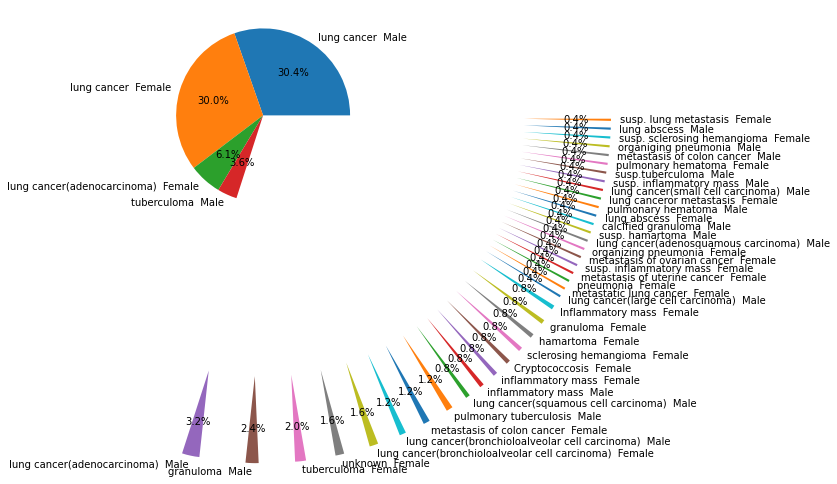

In [19]:
plt.pyplot.pie(z.value_counts(),explode=[0,0,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3],labels=lbl,autopct='%1.1f%%')